In [135]:
import random
simple_grammar = """
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article => 一个 | 这个
noun => 女人 | 篮球 | 桌子 | 小猫
verb => 看着 | 坐在 | 听着 | 看见
Adj => 蓝色的 | 好看的 | 小小的
"""

In [136]:
simplest_grammar = """
number = number number | single_number
single_number = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 0
"""

In [137]:
def adj():  return random.choice('Adj => 蓝色的 | 好看的 | 小小的'.split('|')).split()[0]

In [138]:
def adj_star(): return random.choice([None, adj() + adj()])

In [139]:
adj_star()

'好看的小小的'

## But the Question is ?
如果我们更换了语法，就会发现所有的程序都要重写。:(


In [140]:
# 定义adj语法
adj_grammar = """
Adj* => null | Adj Adj*
Adj => 蓝色的 | 好看的 | 小小的
"""

In [141]:
def create_grammar(grammar_str, split):
    grammar = {}
    for line in grammar_str.split('\n'):
        if not line.strip(): continue  # 注意这里strip不能去除段中的空格
        exp, stmt = line.split(split)
        grammar[exp.strip()] = [s.split() for s in stmt.split('|')]
    return grammar

In [142]:
def generate(gram, target):
    if target not in gram: # means target is a terminal expression
        return target
    if target in gram: # target can be expanded
        new_expanded = [generate(gram, t) for t in random.choice(gram[target])]
        # 这里存在一个函数的递归调用，及对gram中target的内容随机选取并再次调用函数自身
        # 如果这个随机选取出的target是不可迭代的就直接返回，如果仍然是可迭代的就继续迭代
        return ' '.join(e for e in new_expanded if e != 'null')
    else:
        return target
        

In [143]:
example_grammar = create_grammar(simple_grammar, split='=>')

# example_grammar

generate(gram=example_grammar, target='sentence')

'一个  桌子 听着 这个 蓝色的 好看的 蓝色的 小小的  小猫'

In [144]:
#　在西部世界里，一个“人类”的语言可以定义为：

human = """
human = 自己 寻找 活动
自己 = 我 | 俺 | 我们 
寻找 = 找找 | 想找点 
活动 = 乐子 | 玩的
"""


#　一个“接待员”的语言可以定义为

host = """
host = 寒暄 报数 询问 业务相关 结尾 
报数 = 我是 数字 号 ,
数字 = 单个数字 | 数字 单个数字 
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ,
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好 
询问 = 请问你要 | 您需要
业务相关 = 玩玩 具体业务
玩玩 = null
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？
"""

In [145]:
host_gram = create_grammar(host, split='=')
generate(gram=host_gram, target='host')


'女士 , 你好 我是 3 号 , 您需要  打牌 吗？'


## Data Driven
我们的目标是，希望能做以一个程序，当我们输入的数据变化的时候，我们的程序不同重写。 Generalization

Ai? 如何能够自动化解决问题，我们找到一个方法之后，输入变了，我们的这个方法不用变。


## Language Model

$$ language_model(String) = Probability(String) \in (0, 1) $$
$$ Pro(w_1w_2w_3w_4) = Pro(w_1|w_2w_3w_4)*Pro(w_2|w_3w_4)*Pro(w_3|w_4)*Pro(w_4) $$

* 上边是条件概率 

In [146]:
import random
random.choice(range(1000))


44

In [147]:
   
filename = "D:\\datasource\\datasource\\export_sql_1558435\\sqlResult_1558435.csv"

In [148]:
import pandas as pd

In [149]:
content = pd.read_csv(filename, encoding='gb18030')
# articles = content['content'].tolist()
content.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [150]:
articles = content['content'].tolist()
articles[110]

'在外国名著《麦田里的守望者》中，作者想要守护麦田里如自己内心一般纯真的孩子们。而驻村干部们，也在这个炎热的夏天里撸袖子上阵，真正做起了村民们的“麦田守望者”。\r\n三夏时节不等人\r\n你看到了吗？不停翻涌起伏、仿若铺陈至天边的金黄麦浪中，那若隐若现的人影，是自治区新闻出版广电局驻和田市肖尔巴格乡合尼村工作队的队员与工作队组织的青年志愿者。\r\n在这个炎热的夏季，他们深入田间地头，帮助村民们收割小麦。扛起收麦机，麦田中的每个人都显得兴致勃勃，一天下来就近22亩小麦收割完毕。\r\n志愿者麦麦提亚森擦去满脸的汗水，高兴地告诉驻村队员：“我们青年志愿者应该多做贡献，为村里的脱贫致富出把力。工作队带着我们为村里的老人服务，看到那些像我爷爷奶奶一样的老人赞许感谢的目光，我体会到了帮助他人的快乐。”（自治区新闻出版广电局驻村工作队孙敏 艾力依布拉音）\r\n麦收时节 我们在一起\r\n6月中旬的和田墨玉，麦田金黄，静待收割。\r\n6月14日、15日两天，自治区高级人民法院驻和田地区墨玉县吐外特乡罕勒克艾日克村工作队与48名村民志愿者一道，帮助村里29户有需要的村民进行小麦收割工作。\r\n田间地头，罕勒克艾日克村志愿队的红旗迎风飘扬，格外醒目。10余台割麦机一起轰鸣，男人们在用机器收割小麦的同时，几名妇女也加入到志愿队，构成了一道美丽的麦收风景。\r\n休息空闲，工作队员和村民们坐在树荫下、田埂上，互相问好、聊天。语言交流有困难，就用手势、动作比划着聊天，有趣地交流方式不时引来阵阵欢笑。大家在一同享受丰收和喜悦，也一同增进着彼此的情感和友谊。（自治区高级人民法院驻村工作队周春梅 艾地艾木·阿不拉）\r\n细看稻菽千重浪\r\n6月15日，自治区煤田灭火工程局的干部职工们再一次跋涉1000多公里来到了叶城县萨依巴格乡阿亚格欧尔达贝格村，见到了自己的亲戚。现场处处都透出掩盖不住的喜悦，一声声亲切的“谢谢”、一个个结实的拥抱，都透露出浓浓的亲情。\r\n没坐一会儿，在嘘寒问暖中大家了解到在麦收的关键时刻，部分村民家中却存在收割难的问题。小麦成熟期短，收获的时间集中，天气的变化对小麦最终产量的影响极大，如果不能及时收割，会有不小损失的。于是，大家几乎立刻就决定要帮助亲戚们收割麦子。\r\n在茂密的麦地里，干部们每人手持一把镰刀，一字排开，挽起衣袖、卷起裤腿，挥舞着镰刀进行着无

In [151]:
import re

# 定义一个正则表达式
def token(string):
    return re.findall('\w+', string)

In [152]:
# ''.join(token(articles[110]))

In [153]:
# type(token(articles[110]))
articles_clean = [''.join(token(str(a))) for a in articles[:1000]]

articles_clean[1]


'骁龙835作为唯一通过Windows10桌面平台认证的ARM处理器高通强调不会因为只考虑性能而去屏蔽掉小核心相反他们正联手微软找到一种适合桌面平台的兼顾性能和功耗的完美方案报道称微软已经拿到了一些新的源码以便Windows10更好地理解biglittle架构资料显示骁龙835作为一款集成了CPUGPU基带蓝牙WiFi的SoC比传统的Wintel方案可以节省至少30的PCB空间按计划今年Q4华硕惠普联想将首发骁龙835Win10电脑预计均是二合一形态的产品当然高通骁龙只是个开始未来也许还能见到三星Exynos联发科华为麒麟小米澎湃等进入Windows10桌面平台'

In [154]:
import jieba

In [155]:
from collections import Counter
with_jie_ba_cut = Counter(jieba.cut(articles[110]))
with_jie_ba_cut.most_common()[:10]

[('，', 88),
 ('的', 73),
 ('。', 39),
 ('\r\n', 27),
 ('了', 20),
 ('们', 18),
 ('工作队', 16),
 ('村民', 15),
 ('收割', 14),
 ('、', 12)]

In [156]:
def cut(string): return list(jieba.cut(string))

In [157]:
articles_words = [
    cut(string) for string in articles_clean
]

In [158]:
TOKENS = []

In [159]:
from functools import reduce
from operator import add

In [160]:
TOKENS = reduce(add, articles_words)
print('asd')
len(TOKENS)

asd


440274

In [161]:
from collections import Counter

In [162]:
words_count = Counter(TOKENS)

words_count.most_common(10)

[('的', 23730),
 ('在', 6156),
 ('了', 5473),
 ('是', 3990),
 ('和', 3470),
 ('也', 2085),
 ('有', 2001),
 ('月', 1999),
 ('将', 1746),
 ('他', 1617)]

In [163]:
frequences = [f for w, f in words_count.most_common(100)]

In [164]:
x = [i for i in range(100)]

In [165]:
%matplotlib inline
import matplotlib.pyplot as plt

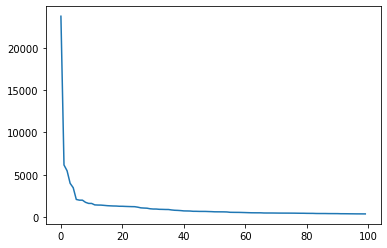

In [166]:
plt.plot(x, frequences)

In [167]:
# 现在我们考虑求一个联合概率

In [168]:
# 先查看一个单词出现的概率
def prob_1(w1):
    return words_count[w1]/len(TOKENS)


In [169]:
prob_1('我们')

0.0020328250135143115

In [170]:
TOKENS[:10]

['此外', '自', '本周', '6', '月', '12', '日起', '除', '小米', '手机']

In [171]:
TOKENS = [str(s) for s in TOKENS]

TOKENS_2_GRAM = [''.join(TOKENS[i:i+2]) for i in range(len(TOKENS[:-2]))]

In [172]:
words_count_2 = Counter(TOKENS_2_GRAM)

In [173]:
def prob_2(w1, w2):
    if w1 + w2 in words_count_2:
        return words_count_2[w1+w2] / len(TOKENS_2_GRAM)
    else:
        return 1 / len(TOKENS_2_GRAM)

In [174]:
prob_2('我们', '想')

2.2713231820329252e-06

In [178]:
def get_probablity(sentence):
    words = cut(sentence)
    
    sentence_pro = 1
    
    for i, word in enumerate(words[:-1]):
        next_ = words[i+1]
        probaility = prob_2(word, next_)
        
        sentence_pro *= probaility
    return sentence_pro

In [180]:
get_probablity('我中奖了')

1.547672699172052e-11

In [182]:
get_probablity('好的我们来看一下')

3.348084228859145e-20

In [184]:
for sen in [generate(gram=example_grammar, target='sentence') for i in range(10)]:
    print('sentence: {} with Prb: {}'.format(sen, get_probablity(sen)))


sentence: 一个  篮球 坐在 这个  桌子 with Prb: 3.6541749413934434e-57
sentence: 这个 小小的 蓝色的 蓝色的  桌子 听着 这个 小小的  小猫 with Prb: 6.06579319252997e-119
sentence: 一个  小猫 听着 一个  桌子 with Prb: 1.6599624511181468e-62
sentence: 这个 好看的 小小的 小小的 好看的  篮球 看着 这个 小小的  桌子 with Prb: 6.199819513024872e-124
sentence: 这个 小小的  女人 听着 一个  女人 with Prb: 8.563595224154257e-74
sentence: 这个  小猫 看见 这个 蓝色的 小小的 好看的  篮球 with Prb: 7.765010688956406e-102
sentence: 这个  女人 坐在 一个  女人 with Prb: 3.6541749413934434e-57
sentence: 这个  桌子 看着 一个 小小的  篮球 with Prb: 1.8851555982644215e-68
sentence: 这个 蓝色的 好看的  小猫 听着 这个 蓝色的 蓝色的 好看的 好看的 小小的 小小的  女人 with Prb: 3.087440278599265e-185
sentence: 这个 小小的 小小的  小猫 坐在 一个  小猫 with Prb: 9.725346177084004e-80
